In [2]:
import demographics
import sys
import os
import xlrd
import subprocess
import numpy
import matplotlib.pyplot as plt

In [3]:
DMA_DEMO_FILE = "DMABYZIP1617.xls"
currZipsForDMA = []
FRESNO = 866
BAYAREA = 807
MONTEREYSALINAS = 828
currDMA = BAYAREA



In [4]:
os.chdir("/Users/willsumfest/preto3/census/dmaFiles")
dmaWorkbook = xlrd.open_workbook(DMA_DEMO_FILE)
sh = dmaWorkbook.sheet_by_index(0)
for index in range(sh.nrows):
    zipVal = sh.cell_value(rowx=index, colx=1)
    if type(zipVal) == int or type(zipVal) == float:
        if int(zipVal) == currDMA:
            currZipsForDMA.append(sh.cell_value(rowx=index, colx=0))
    

In [144]:
"""
If this section is not working, then manually run the census simulation from the terminal.
"""

# os.chdir("/Users/willsumfest/preto3")
# p = subprocess.Popen('bash census_simulation.sh', shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
# for line in p.stdout.readlines():
#     print line
# retval = p.wait()

# print "done"
    

'\nIf this section is not working, then manually run the census simulation from the terminal.\n'

In [5]:
os.chdir('/Users/willsumfest/preto3/census/analysis/zip_codes')

files = os.listdir(".")
paths = [os.path.join(os.getcwd(), f) for f in files]
last_file = max(paths, key=os.path.getctime)
print last_file

/Users/willsumfest/preto3/census/analysis/zip_codes/2017-06-30-11:09.txt


In [6]:
dmaPopulation = 0
dmaUpperBoundPopulation = 0
dmaLowerBoundPopulation = 0
dmaPopForReproductiveMales = 0
dmaUpperBoundRepMale = 0
dmaLowerBoundRepMale = 0
dmaPopForReproductiveFemales = 0
dmaUpperBoundRepFemale = 0
dmaLowerBoundRepFemale = 0

dmaMedianAgeWeightedEstimateTotal = 0
dmaMedianAgeWeightedEstimateUpper = 0
dmaMedianAgeWeightedEstimateLower = 0

dmaMedianIncomeWeightedEstimateTotal = 0
dmaMedianIncomeWeightedEstimateUpper = 0
dmaMedianIncomeWeightedEstimateLower = 0


dmaForeignBornPopMean = 0
dmaForeignBornPopUpper = 0
dmaForeignBornPopLower = 0


with open(last_file) as data_file:
    noDataZips = data_file.readline().split(":")[1].split(",")
    noDataZips[-1] = noDataZips[-1][:-2]
    for i in range(len(noDataZips)):
        noDataZips[i] = int(noDataZips[i].strip())
    noDataZips = set(noDataZips)
    for code in currZipsForDMA:
        if code in noDataZips:
            print code
            currZipsforDMA.remove(code)
    cleaned_data = map(lambda x: x.split("\n"), data_file.read().split("\n\n\n"))
    for i in range(len(cleaned_data)):
        entry = cleaned_data[i]
        cleaned_entry = [x for x in entry if x != '']
        cleaned_data[i] = cleaned_entry
    for code in currZipsForDMA:
        for entry in cleaned_data:
            if entry == []:
                continue
            else:
                zipcode = int(entry[0].split(":")[1][:-1])
                if int(zipcode) == int(code):
                    total_population = int(entry[1].split(":")[1][:-1].split(".")[0])
                    total_population_upper = entry[2].split(":")[1].split(",")[1].split(".")[0]
                    total_population_lower = entry[2].split(":")[1].split(",")[0].split(".")[0]
                    dmaUpperBoundPopulation += int(total_population_upper)
                    dmaLowerBoundPopulation += int(total_population_lower)
                    dmaPopulation += total_population
                    reproductive_male_population = int(entry[3].split(":")[1][:-1].split(".")[0])
                    dmaPopForReproductiveMales += reproductive_male_population
                    
                    dmaUpperBoundRepMale += int(entry[4].split(":")[1].split(",")[1].split(".")[0])
                    dmaLowerBoundRepMale += int(entry[4].split(":")[1].split(",")[0].split(".")[0])
                    
                    reproductive_female_population = int(entry[5].split(":")[1][:-1].split(".")[0])
                    dmaPopForReproductiveFemales += reproductive_female_population
                    
                    dmaUpperBoundRepFemale += int(entry[6].split(":")[1].split(",")[1].split(".")[0])
                    dmaLowerBoundRepFemale += int(entry[6].split(":")[1].split(",")[0].split(".")[0])
                    
                    dmaMedianAgeWeightedEstimateTotal += total_population * int(entry[7].split(":")[1][:-1].split(".")[0])
                    dmaMedianAgeWeightedEstimateUpper += total_population * int(entry[8].split(":")[1].split(",")[1].split(".")[0])
                    dmaMedianAgeWeightedEstimateLower += total_population * int(entry[8].split(":")[1].split(",")[0].split(".")[0])
                    
                    dmaMedianIncomeWeightedEstimateTotal += total_population * int(entry[9].split(":")[1][:-1].split(".")[0])
                    dmaMedianIncomeWeightedEstimateUpper += total_population * int(entry[10].split(":")[1].split(",")[1].split(".")[0])
                    dmaMedianIncomeWeightedEstimateLower += total_population * int(entry[10].split(":")[1].split(",")[0].split(".")[0])
                    
print "Female Reproductive percentage upper bound:" , dmaUpperBoundRepFemale / float(dmaPopulation)
print "Female Reproductive percentage mean:", dmaPopForReproductiveFemales / float(dmaPopulation)
print "Female Reproductive percentage lower bound:", dmaLowerBoundRepFemale / float(dmaPopulation)
print "Male Reproductive percentage upper bound:" , dmaUpperBoundRepMale / float(dmaPopulation)
print "Male Reproductive percentage mean:", dmaPopForReproductiveMales / float(dmaPopulation)
print "Male Reproductive percentage lower bound:", dmaLowerBoundRepMale / float(dmaPopulation)
print "Total Reproductive percentage upper bound:" , (dmaUpperBoundRepFemale  + dmaUpperBoundRepMale) / float(dmaPopulation)
print "Total Reproductive percentage mean:", (dmaPopForReproductiveFemales + dmaPopForReproductiveMales) / float(dmaPopulation)
print "Total Reproductive percentage lower bound:", (dmaLowerBoundRepFemale + dmaLowerBoundRepMale) / float(dmaPopulation)
print "Weighted Mean of Median Ages:", dmaMedianAgeWeightedEstimateTotal / dmaPopulation
print "Weighted Mean of Median Ages Upper Bound:", dmaMedianAgeWeightedEstimateUpper / dmaPopulation
print "Weighted Mean of Median Ages Lower Bound:", dmaMedianAgeWeightedEstimateLower / dmaPopulation
print "Weighted Mean of Median Income:", dmaMedianIncomeWeightedEstimateTotal / dmaPopulation
print "Weighted Mean of Median Income Upper Bound:", dmaMedianIncomeWeightedEstimateUpper / dmaPopulation
print "Weighted Mean of Median Income Lower Bound:", dmaMedianIncomeWeightedEstimateLower / dmaPopulation


                    

Female Reproductive percentage upper bound: 0.279577266579
Female Reproductive percentage mean: 0.20405545532
Female Reproductive percentage lower bound: 0.128502740336
Male Reproductive percentage upper bound: 0.290018662896
Male Reproductive percentage mean: 0.210441322443
Male Reproductive percentage lower bound: 0.13083332451
Total Reproductive percentage upper bound: 0.569595929474
Total Reproductive percentage mean: 0.414496777763
Total Reproductive percentage lower bound: 0.259336064845
Weighted Mean of Median Ages: 38
Weighted Mean of Median Ages Upper Bound: 40
Weighted Mean of Median Ages Lower Bound: 36
Weighted Mean of Median Income: 84905
Weighted Mean of Median Income Upper Bound: 93647
Weighted Mean of Median Income Lower Bound: 76162


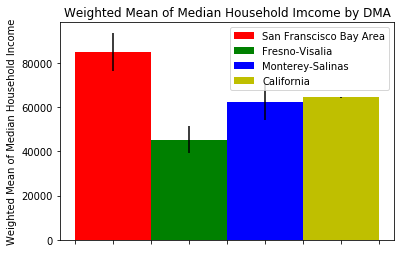

In [8]:
dmas = ["San Franscisco Bay Area", "Fresno-Visalia", "Monterey-Salinas"]
bayArea = [84905]
bayAreaSD = .10297
bayAreaErr = bayAreaSD*bayArea[0]
fresno = [45295]
fresnoSD = .136019
fresnoErr = fresnoSD*fresno[0]
monterey = [62211]
montereySD = .130395
montereyErr = montereySD*monterey[0]
california = [64500]
californiaErr = 241


# mean = [84905, 45295, 62211]
# upper = [93647, 51456, 70323]
# lower = [76162, 39133, 54097]

ind = numpy.arange(1)
width = .20
fig, ax = plt.subplots()

rects1 = ax.bar(ind, bayArea, width, color='r', yerr=bayAreaErr)

rects2 = ax.bar(ind + width, fresno, width, color='g', yerr=fresnoErr)

rects3 = ax.bar(ind + (2*width), monterey, width, color='b', yerr=montereyErr)

rects4 = ax.bar(ind + (3*width), california, width, color='y', yerr=californiaErr)

ax.set_ylabel('Weighted Mean of Median Household Income')
ax.set_title('Weighted Mean of Median Household Imcome by DMA')

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ("San Franscisco Bay Area", "Fresno-Visalia", "Monterey-Salinas", "California"))
plt.setp(ax.get_xticklabels(), visible=False)


plt.show()



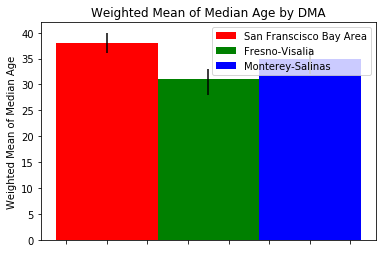

In [152]:
monterey = [35]
montereyErr = [[(35-32)/float(35)*monterey[0]], [(37-35)/float(35)*monterey[0]]]
fresno = [31]
fresnoErr = [[(31-28)/float(31)*fresno[0]], [(33-31)/float(31)*fresno[0]]]
bayArea = [38]
bayAreaErr = (40-38)/float(38)*bayArea[0]



ind = numpy.arange(1)
width = .25
fig, ax = plt.subplots()

rects1 = ax.bar(ind, bayArea, width, color='r', yerr=bayAreaErr)

rects2 = ax.bar(ind + width, fresno, width, color='g', yerr=fresnoErr)

rects3 = ax.bar(ind + (2*width), monterey, width, color='b', yerr=montereyErr)

ax.set_ylabel('Weighted Mean of Median Age')
ax.set_title('Weighted Mean of Median Age by DMA')

ax.legend((rects1[0], rects2[0], rects3[0]), ("San Franscisco Bay Area", "Fresno-Visalia", "Monterey-Salinas"))
plt.setp(ax.get_xticklabels(), visible=False)


plt.show()